In [3]:
from myAE import SDC_AE
import torch

manager = SDC_AE(kind='ae_wl')
manager.prepare_data()
manager.prepare_model(2, 2)

def calc_loss(model, x, y, F, device):
  z = model.get_submodule("encoder")(x)
  x_hat, l = model.get_submodule("decoder")(z)
  
  loss = F.cross_entropy(l, y, reduction='sum')/len(x) + F.binary_cross_entropy(x_hat, x, reduction='sum')/len(x)
  return loss

hist = manager.train(calc_loss, epochs=50)

Now, it is working on cuda:0.


100%|██████████| 50/50 [04:14<00:00,  5.09s/it]


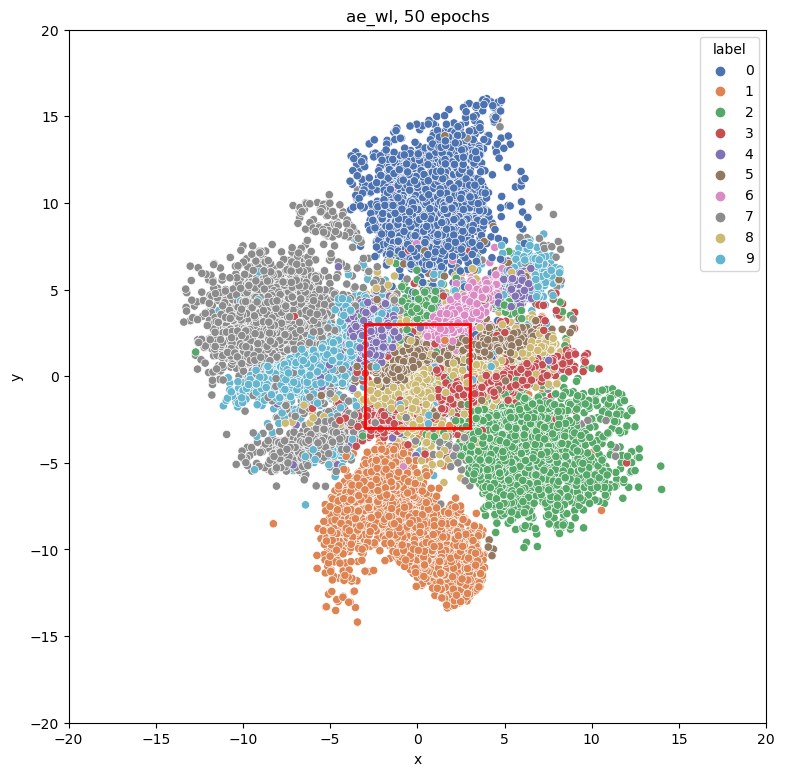

In [5]:
manager.show_latent_space('ae_wl, 50 epochs', data_ratio=0.5, xlim=[-20, 20], ylim=[-20, 20])

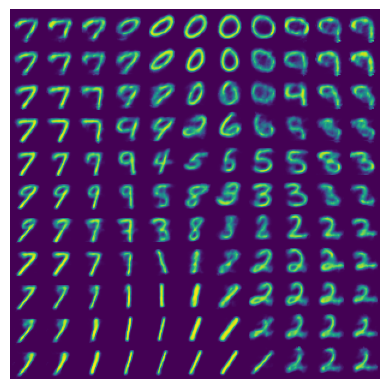

In [11]:
import matplotlib.pyplot as plt

grid_x, grid_y = torch.meshgrid(torch.linspace(-10, 10, 11), torch.linspace(-10, 10, 11), indexing='xy')
points = torch.stack([grid_x, grid_y], dim=2)

def plot_reconstructed(decoder, points):
  w = 28
  n = len(points)
  img = torch.zeros((n*w, n*w))
  for i, r in enumerate(points):
    tmps, l = decoder(r)
    tmps = tmps.view([-1, 1, 28, 28])
    for j, tmp in enumerate(tmps):
      img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = tmp[0]
  plt.axis('off')
  plt.imshow(img)

with torch.no_grad():
  plot_reconstructed(manager.model.get_submodule('decoder'), points)
  

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:04<00:00,  4.87s/it]


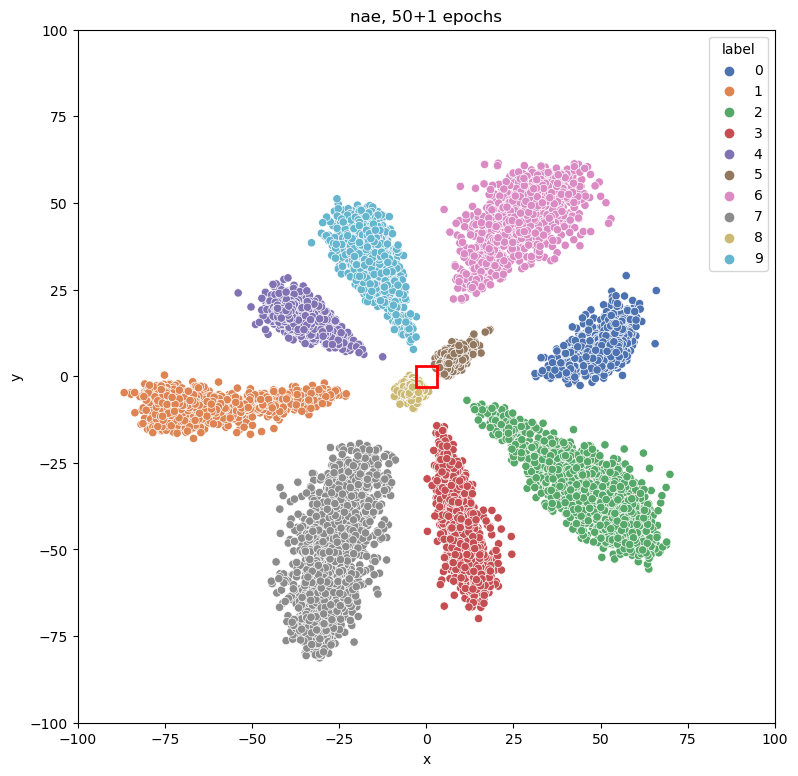

In [13]:
def calc_loss_nae(model, x, y, F, device):
  z = model.get_submodule("encoder")(x)
  pred = model.get_submodule("decoder")(z)
  
  likelihood = F.binary_cross_entropy(pred, x, reduction='sum')/len(x)
  return likelihood

hist_nae = manager_nae.train(calc_loss_nae, epochs=1)
manager.show_latent_space('nae, 50+1 epochs', data_ratio=0.3, xlim=[-100, 100], ylim=[-100, 100])

Now, it is working on cuda:0.


100%|██████████| 1/1 [00:04<00:00,  4.91s/it]


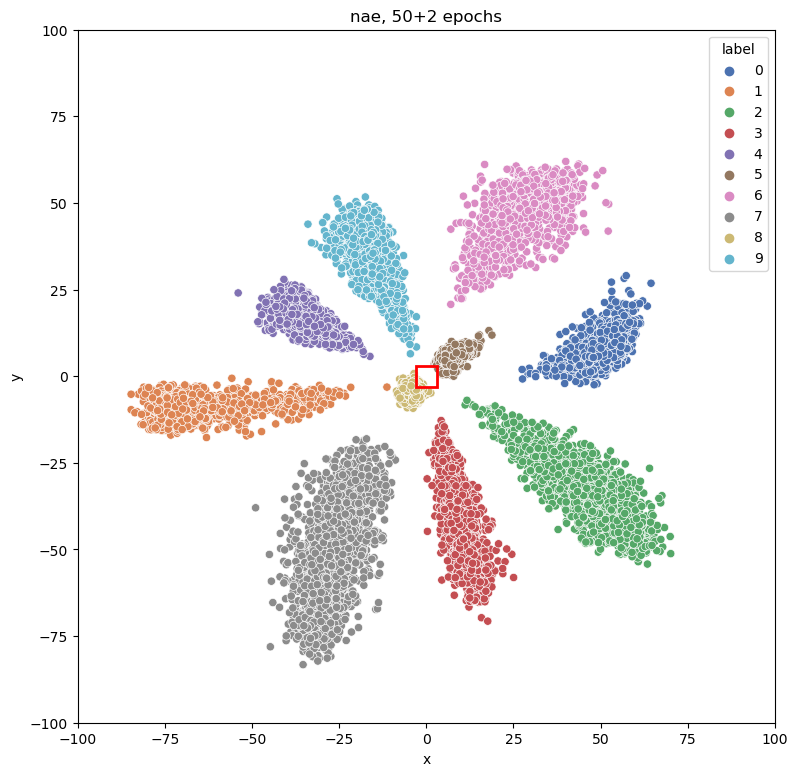

In [14]:
hist_nae = manager_nae.train(calc_loss_nae, epochs=1)
manager.show_latent_space('nae, 50+2 epochs', data_ratio=0.3, xlim=[-100, 100], ylim=[-100, 100])

Now, it is working on cuda:0.


100%|██████████| 8/8 [00:38<00:00,  4.87s/it]


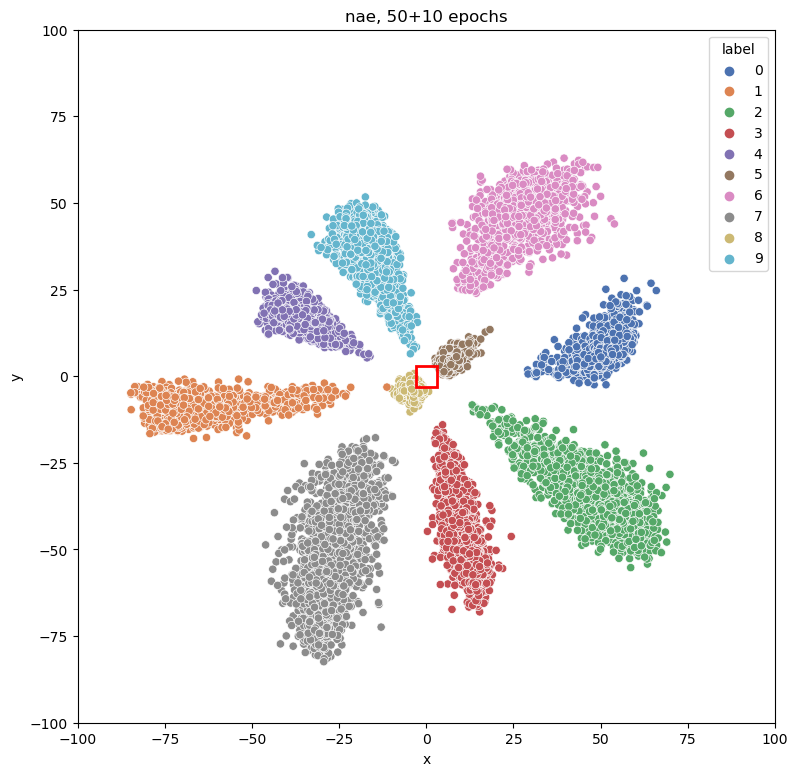

In [15]:
hist_nae = manager_nae.train(calc_loss_nae, epochs=8)
manager.show_latent_space('nae, 50+10 epochs', data_ratio=0.3, xlim=[-100, 100], ylim=[-100, 100])

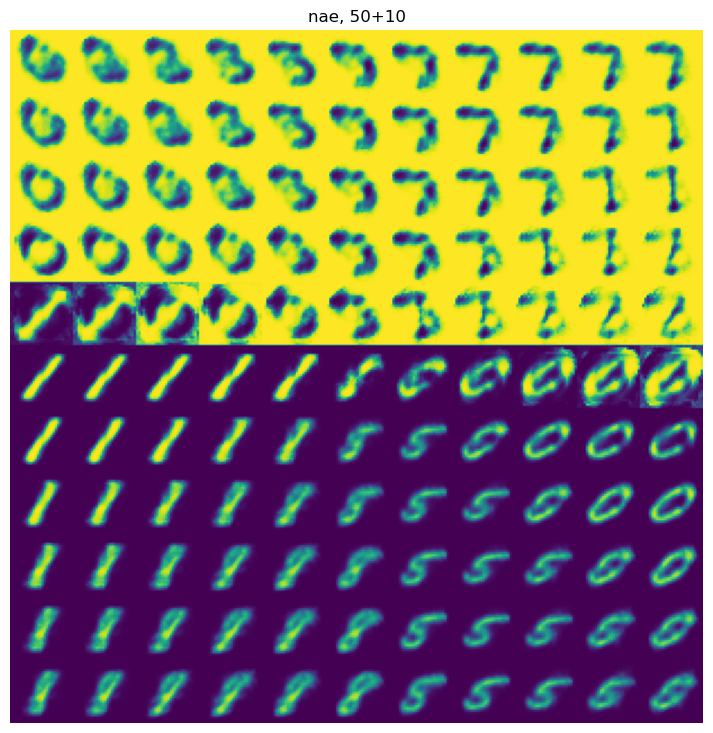

In [21]:
manager_nae.model.to('cpu')
manager_nae.plot_generated_images('nae, 50+10', xlim=[-10, 10], ylim=[-10, 10])